<a href="https://colab.research.google.com/github/Uk-jake/BikePrediction/blob/main/2022208026%EC%9E%A5%EC%9A%B1_%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EA%B3%BC%EC%A0%9C_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 서울시 공공 자전거 이용자 수 예측을 통한 쏠림현상 해결
### [인공지능과제] - 2022208206 장욱


## 기존 Kaggle 코드와의 차별성
### 1. 데이터 EDA 방법론의 다양화 및 심화

- **데이터 클린징과 결측치 분석**: 기존 Kaggle 코드들과 달리, 본 프로젝트에서는 데이터 분석에 앞서 철저한 데이터 클린징과 결측치 분석을 수행했습니다. 이를 통해 데이터의 정확성을 높이고, 보다 신뢰할 수 있는 분석 결과를 도출할 수 있었습니다.
- **다차원 상관관계 분석**: 데이터 간의 상관관계를 단순한 수치적 접근을 넘어 다차원 공간에서 분석함으로써, 보다 깊이 있는 인사이트를 얻을 수 있었습니다.
- **논리적 변수 선정**: 종속변수와 독립변수의 선정 과정에서 히트맵과 상관관계 막대그래프를 활용하여, 논리적이고 체계적인 접근을 시도했습니다.

### 2. 다양한 회귀 모델의 적용 및 성능 비교

- **다중 모델 적용**: 자전거 이용량 예측 모델을 개발할 때, 단일 모델이 아닌 선형회귀(LinearRegression), 결정트리회귀(DecisionTreeRegressor), 릿지회귀(Ridge) 등 3가지 다양한 모델을 적용하여 비교 분석했습니다.
- **포괄적 성능 평가**: 모델의 성능 평가 시, 단순히 정확도(Score)만을 고려하는 것이 아니라 R값, Adjusted R, MSE, MAE 등의 다양한 지표를 통해 보다 포괄적이고 세밀한 성능 비교를 수행했습니다.

### 3. 문제 정의 및 해결책 제시를 통한 프로젝트 스토리 구축

- **문제 정의**: 기존 Kaggle 프로젝트들이 단순한 데이터 분석에 그치는 것과 달리, 본 프로젝트에서는 서울 시민들이 겪는 '쏠림현상'이라는 구체적인 문제를 정의하고 이를 중심으로 프로젝트를 전개했습니다.
- **해결책 제시 및 스토리 구축**: 국내 논문과 기사를 통해 배경 지식을 쌓고, 자전거 이용량 예측을 통한 문제 해결 방안을 제시함으로써, 단순한 데이터 분석을 넘어 실질적인 사회 문제 해결을 지향하는 스토리를 구축했습니다.

### 개요 및 필요성
1. 따릉이 쏠림 현상
2. 노동자 분배 작업
서울 시 공공자전거 서비스인 '따릉이' 수요가 증가함에 따라 쏠림 현상이 발생하고 있음. 이를 해결하기 위해 서울 시는 노동자 분배 작업을 통해서 해결하려고 하고 있지만 늘어나는 인건비와 작업의 한계가 존재하여 문제가 해결되지 않음. 이를 해결하기 위해 자전거 이용자 수 예측을 통해 쏠림 현상을 해결할 것임.

#Dataset EDA

In [ ]:
import matplotlib.pyplot as plt  # 시각화를 위한 matplotlib 라이브러리
import numpy as np               # 수치 계산을 위한 numpy 라이브러리
import pandas as pd              # 데이터 처리를 위한 pandas 라이브러리
import seaborn as sns            # 시각화를 위한 seaborn 라이브러리

from sklearn.ensemble import RandomForestRegressor  # 랜덤 포레스트 회귀 모델
from sklearn.linear_model import LinearRegression   # 선형 회귀 모델
from sklearn.model_selection import train_test_split  # 데이터 분할을 위한 함수
from sklearn.preprocessing import StandardScaler     # 데이터 스케일링을 위한 클래스

sns.set_theme()

# 데이터 파일 경로 지정
DATAFILE='/content/SeoulBikeData .csv'

# pandas를 사용하여 CSV 파일 읽기
df_bikes = pd.read_csv(DATAFILE, encoding='unicode_escape')

# 데이터 복사본 생성 (원본 데이터 보존)
df = df_bikes.copy()

# 'Date' 열을 datetime 객체로 변환 (날짜 형식 지정)
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# 원본 데이터프레임에서도 'Date' 열을 datetime 객체로 변환 (형식 지정)
df_bikes.Date = pd.to_datetime(df_bikes.Date, format="%d/%m/%Y")

# 데이터프레임의 처음 5행을 출력하여 데이터 확인
df_bikes.head()


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [ ]:
df_bikes.shape

(8760, 14)

## 데이터 클린징
데이터 전처리를 수월하기 위해 열의 이름에 공백과 특수문자를 제거

In [ ]:
import re
def cleanse(x):
    return re.sub(r'\(.*$','',x).strip().replace(' ','_')

df_bikes.columns = df_bikes.columns.to_series().apply(cleanse)
df_bikes.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


## 결측치 분석
데이터 전처리 전 결측치가 있는지 확인.
결측치란 관측되어야 할 값을 얻지 못한 데이터로 데이터의 오류 혹은 누락을 의미합니다. 이러한 데이터가 존재할 시 적절한 대처가 필요함.

In [ ]:
# 데이터 프레임에 Null 값이 있는지 확인
df_bikes.isna().sum()

Date                     0
Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
dtype: int64

결측치가 없기 때문에 특정 값으로 대치할 필요 없음.

## 데이터 상관관계 분석
프로젝트의 목표인 자전거 이용률을 분석하기 위해 데이터들의 상관관계를 분석하여 자전거 이용률과 상관관계가 높은 데이터를 분석한다.

### 이슬점 온도
이용 가능한 데이터 셋에는 온도, 습도, 이슬점 데이터가 존재하는데 이슬점은 대기 속의 수증기가 얼마나 포함되어 있는지로 온도와 습도를 통해 알 수 있다. 즉, 이슬점은 온도와 습도에 상대적인 데이터임.

아래 코드를 통해 온도와 습도를 독립변수라고 취급하고 이슬점을 종속변수로 정한 후 확인해보자.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 독립 변수로 사용할 'Temperature'와 'Humidity' 열을 선택.
X = df_bikes[['Temperature','Humidity']]
# 종속 변수로 사용할 'Dew_point_temperature' 열을 선택.
y = df_bikes['Dew_point_temperature']

# 데이터를 훈련 세트와 테스트 세트로 분할.
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 선형 회귀 모델 객체를 생성.
model = LinearRegression()
# 훈련 세트를 사용하여 모델을 학습.
model.fit(X_train, y_train)
# 테스트 세트를 사용하여 모델의 성능을 평가.
score = model.score(X_test, y_test)
print(score)

0.9918058256493719


In [ ]:
df_bikes.drop(columns='Dew_point_temperature', inplace=True)

선형회귀 분석을 통해 온도와 습도를 독립변수로 결정하고 이슬점을 종속변수로 결졍하여 학습시키고 스코어를 확인해보니 99라는 수치가 나옴. 즉, 위 코드를 통해 이슬점은 온도와 습도에 의해서 결정된다는 것을 알 수 있기 떄문에 추 후 데이터 학습시 이슬점이라는 특징은 제거하는 학습 시 더 좋은 결과를 나타낼 것이다.

### Dates, Holiday Seasons의 상관관계

In [ ]:
# 'Holiday' 열의 문자열 값을 숫자로 매핑합니다. 'No Holiday'는 0으로, 'Holiday'는 1로 변환.
df_bikes.Holiday = df_bikes.Holiday.map({'No Holiday':0, 'Holiday':1})

# 'Seasons' 열의 문자열 값을 숫자로 매핑합니다. 각 계절을 숫자로 변환.
df_bikes.Seasons = df_bikes.Seasons.map({'Spring':0, 'Summer':1, 'Autumn':2, 'Winter':3})

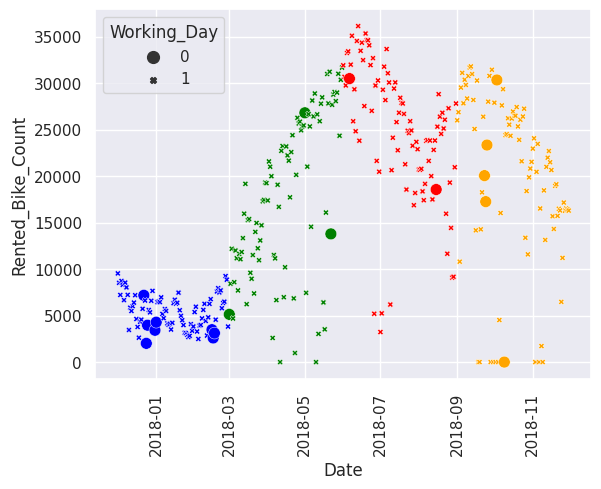

In [ ]:
# 계절에 따른 색상을 지정하는 딕셔너리를 생성.
colors = {0:'green', 1:'red', 2:'orange',3:'blue'}

# 데이터를 그룹화할 열을 지정.
keys = ['Date','Seasons','Holiday']

# 'Date', 'Seasons', 'Holiday'를 기준으로 그룹화하고, 자전거 대여 횟수를 합산.
# 그룹화된 데이터를 다시 데이터프레임으로 변환.
_ = df_bikes[keys + ['Rented_Bike_Count']].groupby(keys).sum().reset_index()

# 'Working_Day' 열을 추가합니다. 여기서 'Holiday'의 반대 값을 가집니다.
# 즉, 휴일이 아니면 1, 휴일이면 0입니다.
_['Working_Day'] = 1 - _.Holiday

# seaborn의 scatterplot을 사용하여 데이터를 시각화함.
# 'Date'를 x축으로, 'Rented_Bike_Count'를 y축으로 설정.
# 'Seasons'에 따라 색상을 지정하고, 'Working_Day'에 따라 점의 스타일과 크기를 다르게 표시.
sns.scatterplot(data=_, x='Date', y='Rented_Bike_Count', c=_.Seasons.map(colors), style='Working_Day', size='Working_Day')

# x축의 레이블을 90도 회전하여 날짜가 겹치지 않게 표시.
plt.xticks(rotation=90);

 위 그래프를 통해 날짜와 계절, 공휴일 따른 자전거 이용률을 확인할 수 있음. 데이터 결과 5월부터 7월 사이, 9월부터 10월 사이에 이용률이 높고 1월부터 3월 사이에는 이용률이 낮은 것을 알 수 있음.

추가로 계절보다는 온도의 데이터가 자전거 이용률을 예측하는데 도움이 되는 데이터라는 것을 알 수 있음. 그리고 공휴일과 자전거 이용륭의 상관관계는 아주 미미함.

*  공휴일 데이터는 이용률에 상관관계가 없다고 판단.
*  계절 데이터는 날짜 데이터에 암시되어있음을 알 수 있음.

In [ ]:
fields = ['Rented_Bike_Count','Hour','Functioning_Day']
df_bikes[ df_bikes.Date == pd.to_datetime('2018-10-06')][fields].sort_values(by='Hour')
non_functioning_days = df_bikes.query('Functioning_Day=="No"').Date.unique()
df_bikes = df_bikes[ ~df_bikes.Date.isin(non_functioning_days)]
df_bikes.drop(columns='Functioning_Day', inplace=True)

<ipython-input-10-6877d41616ad>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bikes.drop(columns='Functioning_Day', inplace=True)


### Snowfall과 Rainfall의 상관관계
강수량과 강설량에 따른 자전거 대여 개수를 분석해보겠음.
위 데이터에 마커를 이용해 눈이 온 날은 파란색, 비가 온 날은 빨간색 마커를 찍고 기본 값은 초록색 값으로 설정

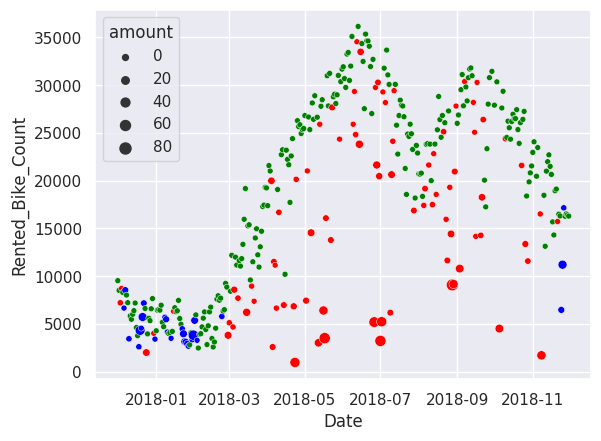

In [ ]:
# 강수 유형을 결정하는 함수.
# 눈(snowfall)이 있으면 'blue', 비(rainfall)가 오면 'red', 그렇지 않으면 'green'을 반환.
def preciptation_type(x):
    if x.Snowfall > 0:
        return 'blue'
    elif x.Rainfall > 0:
        return 'red'
    return 'green'

vals = ['Rented_Bike_Count','Rainfall','Snowfall']
keys = ['Date']

# 데이터프레임에서 'Date' 열로 그룹화하고, 'Rented_Bike_Count', 'Rainfall', 'Snowfall'의 합계를 계산.
_ = df_bikes[keys + vals].groupby(keys).sum().reset_index()

# 각 날짜에 대해 강수 유형을 결정.
_['precipitation'] = _.apply(preciptation_type, axis=1)

#비가 오거나 눈이 오면 해당 값을, 그렇지 않으면 0을 사용.
_['amount'] = _.apply(lambda x: x.Rainfall or x.Snowfall, axis=1)

# seaborn의 scatterplot을 사용하여 강수 유형에 따라 다른 색상으로 날짜별 자전거 대여 횟수를 시각화.
# 강수량에 따라 점의 크기가 달라짐.
sns.scatterplot(data=_, x='Date', y='Rented_Bike_Count', size='amount', c=_['precipitation']);


위 데이터를 확인해본 결과

비가 많이 오는 날에는 자전거 이용률이 현저히 떨어지는 것을 확인할 수 있다. 하지만 왼쪽 아래 그래프를 확인해보면 강설량이 자전거 이용률에 미치는 영향은 거의 없다고 볼 수 있음.

### Heat, Humidity and Sunshine 상관관계

온도, 습도, 햇살이 자전거 대여에 어떠한 영향을 미치는지 산점도 그래프를 통해 확인
동그라미의 크기는 자전거 이용률을 나타내고 마커의 색은 햇빛의 양을 보여준다. 색상이 파란색과 빨간색으로 구분되는데 어두운 파란색이 햇빛이 적을 때이고 진한 빨간색이 햇빛이 가장 강할 때를 뜻함.

/usr/local/lib/python3.10/dist-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


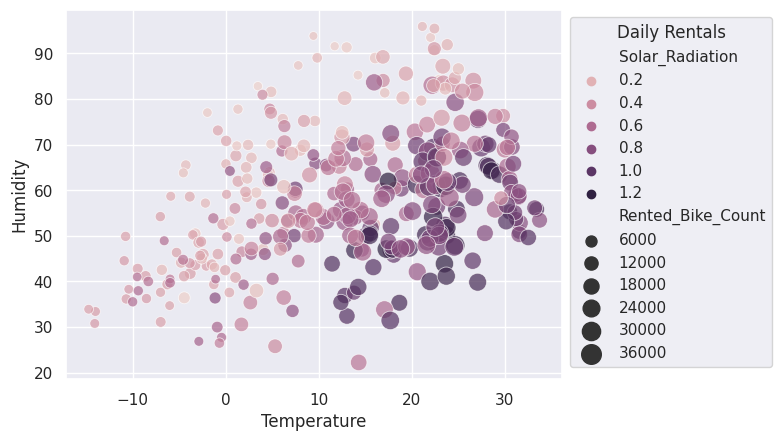

In [ ]:
# 관심 있는 열을 선택합니다: 'Rented_Bike_Count', 'Solar_Radiation', 'Temperature', 'Humidity'
vals = ['Rented_Bike_Count','Solar_Radiation', 'Temperature','Humidity']
# 'Date' 열을 키로 사용합니다.
keys = ['Date']
# 각 변수에 대해 적용할 집계 함수를 정의합니다.
agg_funcs = {
    'Rented_Bike_Count' : 'sum',  # 자전거 대여 횟수의 합계
    'Temperature' : 'mean',       # 평균 온도
    'Humidity' : 'mean',          # 평균 습도
    'Solar_Radiation':'mean'      # 평균 일사량
}

# 데이터프레임에서 'Date' 열로 그룹화하고, 정의된 집계 함수를 적용합니다.
_ = df_bikes[keys + vals].groupby(keys).agg(agg_funcs).reset_index()

# 색상 맵을 'bwr' (blue-white-red)로 설정합니다.
cmap = sns.color_palette("bwr", as_cmap=True)

# seaborn의 scatterplot을 사용하여 온도와 습도에 따른 자전거 대여 횟수를 시각화합니다.
# 일사량에 따라 색상이 변하고, 자전거 대여 횟수에 따라 점의 크기가 달라집니다.
# 점의 크기 범위를 (40, 200)으로 설정하고, 투명도는 0.7로 설정합니다.
ax = sns.scatterplot(data=_, x='Temperature', y='Humidity', size='Rented_Bike_Count', hue=_.Solar_Radiation, cmap=cmap, sizes=(40,200), alpha=0.7)

# 범례를 그래프 밖에 위치시키고, 범례의 제목을 'Daily Rentals'로 설정합니다.
ax.legend(bbox_to_anchor=(1, 1), title="Daily Rentals");

위 그래프를 통해 습도가 40 ~ 60사이 온도가 10 ~ 25사이에 자전거 이용률이 가장 높은 것을 알 수 잇음.

또한 이 데이터를 통해 햇빛과 습도 사이의 관계를 알 수 있었음. 그래프 오른쪽을 보면 햇빛과 습도 사이에 역관계가 있는 것을 알 수 있음. 습도가 높아짐에 따라 날씨가 흐려져 햇빛의 양에 영향을 준다는 것을 알 수 있음.

### 시간과 이용률의 상관관계

시간과 자전거 이용률의 상관관계를 찾아볼꺼임.
이용률을 조금 더 직관적으로 보기 위해 이용률을 %로 계산하여 확인할 것임

(0.0, 23.0)

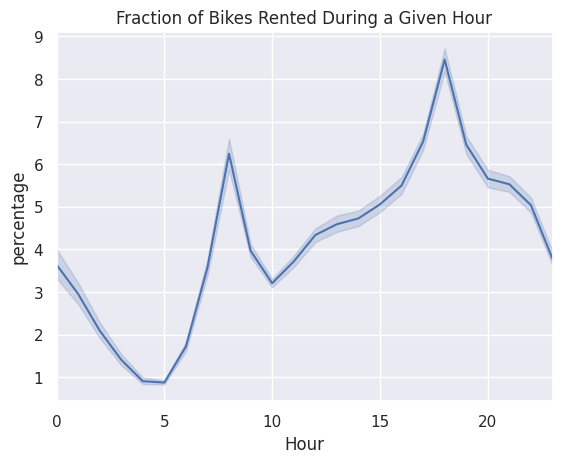

In [ ]:
# 'Date', 'Hour', 'Rented_Bike_Count' 열을 선택하여 새로운 데이터 프레임 생성
_ = df_bikes[['Date','Hour','Rented_Bike_Count']].copy()

# 각 날짜별로 시간대별 대여 횟수의 비율을 계산
# 이 비율은 해당 시간대의 대여 횟수를 해당 날짜의 전체 대여 횟수로 나눈 값입니다.
_['percentage'] = _.groupby('Date')['Rented_Bike_Count'].transform( lambda x : 100*x / x.sum() )

# 시간대별로 계산된 자전거 대여 비율을 선 그래프로 시각화
sns.lineplot(data=_, x='Hour', y='percentage')

# 그래프의 제목 설정
plt.title("Fraction of Bikes Rented During a Given Hour")

# x축의 범위 설정 (0부터 23까지)
plt.xlim(0,23)

오전 8시와 오후 6시에 사용량이 가장 많음 -> 이는 출퇴근시간에 대한 상관관계가 있다고 생각할 수 있음.

추가로 날짜에 따른 변동 폭이 적은 것을 보아 날짜보다 시간과 자전거 이용률에 대한 상관관계가 크다는 것을 알 수 있음.

## 전체 데이터 시각화
존재하는 데이터들의 상관관계를 하나의 그래프를 통해 분석해보기

일단 지금까지 특정 데이터들의 상관관계 분석을 통해

*  이슬점은 온도와 강수량에 상대적인 데이터임
*  계절 데이터는 날짜와 온도 데이터에 결정되는 데이터임
*  공휴일과 강설량은 자전거 이용률과 상관관계가 적음

아래 그래프를 통해 지금까지 증명한 가설들이 맞는지 확인하고 모델의 특징을 선택하는 과정을 진행할 것임.


In [ ]:
# 'Rented_Bike_Count' 열을 제외한 모든 열을 특성(X)으로 선택.
X = df_bikes.drop(columns='Rented_Bike_Count')

# 'Hour' 열을 맨 뒤로 이동합니다. pop 메서드는 해당 열을 반환하고 데이터프레임에서는 제거.
# 이를 다시 X['Hour']에 할당함으로써 열의 순서를 변경.
X['Hour'] = X.pop('Hour')

# 'Date' 열의 데이터를 날짜 차이로 변환.
# '2018-01-01'을 기준으로 하여 각 날짜의 차이를 일 수(days)로 계산.
X['Date'] = (X.Date - pd.to_datetime('2018-01-01')).apply(lambda x: x.days)

# 타겟 변수(y)로 'Rented_Bike_Count'를 선택.
y = df_bikes.Rented_Bike_Count

# 범주형 변수의 이름을 리스트로 저장.
categorical_cols = ['Seasons', 'Holiday', 'Hour']

# 연속형 변수의 이름을 리스트로 저장.
# X.columns에서 범주형 변수를 제외한 나머지를 선택.
continuous_cols = [x for x in X.columns if x not in categorical_cols]


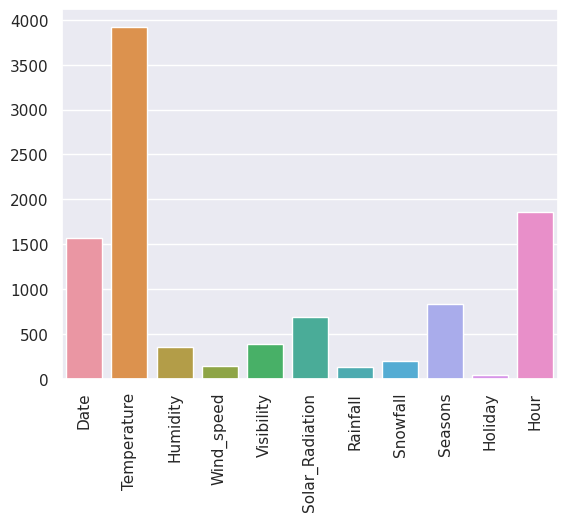

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
import seaborn as sns
import matplotlib.pyplot as plt

univariate = SelectKBest(f_regression, k='all')

# fit 메서드를 사용하여 특성(X)과 타겟 변수(y)에 대한 F-검정을 수행.
univariate.fit(X, y)

# seaborn의 barplot을 사용하여 각 특성의 F-검정 점수를 막대 그래프로 시각화.
sns.barplot(x=X.columns, y=univariate.scores_)

plt.xticks(rotation=90)

plt.show()


위 그래프는 자전거 이용률과 X축에 있는 데이터들의 상관관계를 시각화한 자료이다.

이를 통해 온도, 날짜, 시간 데이터가 자전거 이용률에 가장 많은 영향을 준다는 것을 알 수 있다.

<ipython-input-17-d50682d94312>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


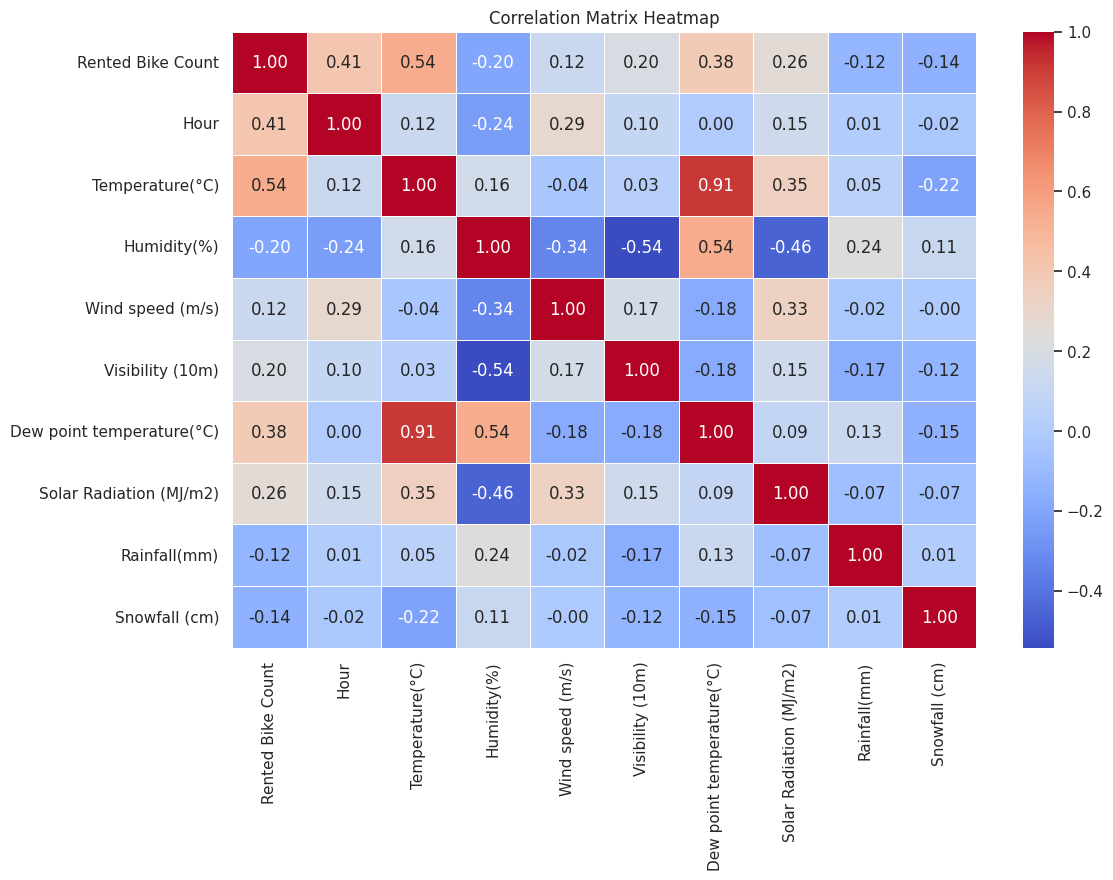

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

df = df.drop(['Seasons', 'Holiday'], axis=1)

correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix Heatmap')

plt.show()


위 히트맵을 통해 자전거 이용률과 상관관계가 있는 데이터는

*  시간
*  온도
*  이슬점

이라는 것을 알 수 있음.
하지만 이전 데이터 분석 단계에서 이슬점은 온도와 강수량에 대한 종속변수임을 증명했기 떄문에 자전거 이용율에 대한 독립변수를 결정할 때, 이슬점 대신 온도와 강수량을 사용할 것임.

정리하자면, 우리는 데이터 분석 과정을 통해 자전거 이융률에 대한 독립변수를 시간, 온도, 강수량이라는 것을 알게 되었음.

시간, 온도, 강수량에 따른 자전거 이용률 예측 모델을 만들 것임


## 모델 생성

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# 데이터프레임에서 예측 모델에 사용할 특성(독립 변수)을 선택.
# 'Hour', 'Temperature(°C)', 'Humidity(%)' 열을 특성으로 사용.
X = df[['Hour', 'Temperature(°C)', 'Humidity(%)']]

# 데이터프레임에서 예측할 대상(종속 변수)을 선택.
# 'Rented Bike Count' 열을 대상 변수로 사용.
Y = df['Rented Bike Count']

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import numpy as np

# 데이터 준비
# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 모델 초기화
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'Ridge Regression': Ridge(alpha=1.0)
}

# 성능 비교를 위한 딕셔너리
performance_comparison = {}

# 모델 훈련 및 평가
for model_name, model in models.items():
    # 훈련
    model.fit(X_train, y_train)
    # 예측
    predictions = model.predict(X_test)

    # 성능 지표 계산
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    n = len(y_test)  # 샘플 수
    p = X_test.shape[1]  # 특성 수
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    # 성능 저장
    performance_comparison[model_name] = {
        'MSE': mse,
        'MAE': mae,
        'R2': r2,
        'Adjusted R2': adjusted_r2
    }

# 성능 비교 그래프
metrics = ['MSE', 'MAE', 'R2', 'Adjusted R2']

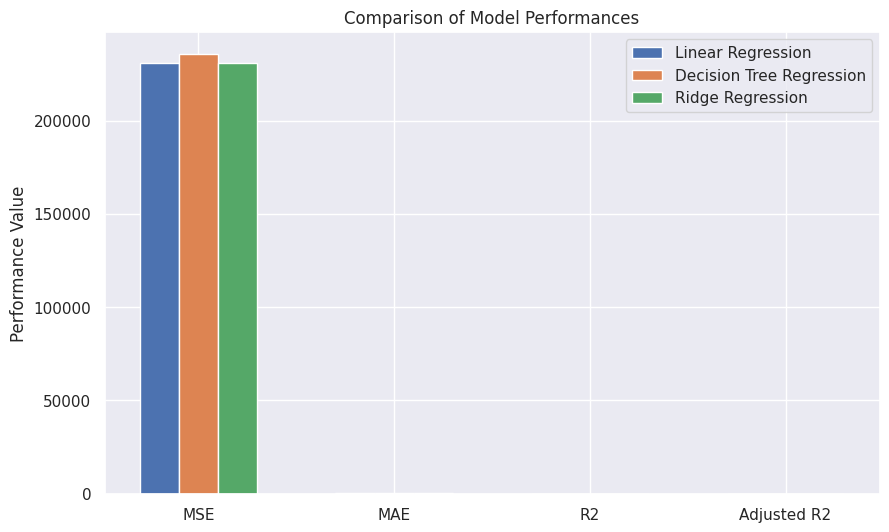

In [ ]:
# 성능 지표 이름
metrics = ['MSE', 'MAE', 'R2', 'Adjusted R2']

# 모델 이름
model_names = list(models.keys())

# 성능 지표 값 추출
performance_values = [[performance_comparison[model][metric] for metric in metrics] for model in model_names]

# 성능 지표를 numpy 배열로 변환
performance_array = np.array(performance_values)

# 각 지표별로 정규화 (옵션)
# performance_array = performance_array / performance_array.max(axis=0)

# 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))

# 각 모델에 대한 막대 위치
barWidth = 0.2
positions = np.arange(len(metrics))

# 각 모델별로 막대 그리기
for i, (model_name, values) in enumerate(zip(model_names, performance_array)):
    ax.bar(positions + i * barWidth, values, width=barWidth, label=model_name)

# 축 설정
ax.set_xticks(positions + barWidth)
ax.set_xticklabels(metrics)
ax.set_title('Comparison of Model Performances')
ax.set_ylabel('Performance Value')
ax.legend()

# 그래프 표시
plt.show()


<ipython-input-21-25c69b901267>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({
<ipython-input-21-25c69b901267>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({
<ipython-input-21-25c69b901267>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({
<ipython-input-21-25c69b901267>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({
<ipython-input-21-25c69b901267>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

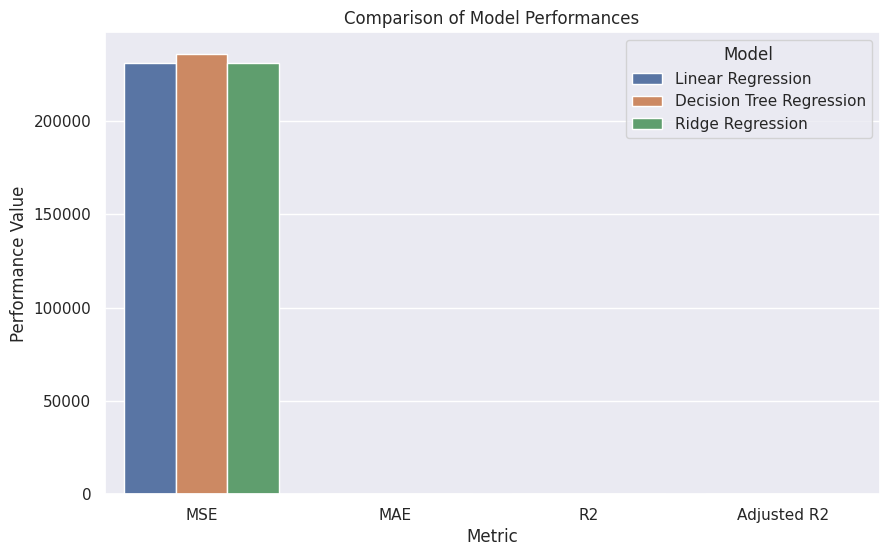

In [ ]:
import pandas as pd
import seaborn as sns

# 성능 지표와 모델 이름을 포함하는 데이터프레임 생성
performance_df = pd.DataFrame(columns=['Model', 'Metric', 'Value'])

# 데이터프레임에 성능 지표 데이터 채우기
for model_name in models.keys():
    for metric in metrics:
        performance_df = performance_df.append({
            'Model': model_name,
            'Metric': metric,
            'Value': performance_comparison[model_name][metric]
        }, ignore_index=True)

# seaborn을 사용하여 멀티 막대 그래프 생성
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', hue='Model', data=performance_df)

# 그래프 제목과 레이블 설정
plt.title('Comparison of Model Performances')
plt.ylabel('Performance Value')

# 그래프 표시
plt.show()


                       Model       Metric          Value
0          Linear Regression          MSE  231010.840340
1          Linear Regression          MAE     354.513205
2          Linear Regression           R2       0.445547
3          Linear Regression  Adjusted R2       0.444595
4   Decision Tree Regression          MSE  235737.195063
5   Decision Tree Regression          MAE     279.017409
6   Decision Tree Regression           R2       0.434203
7   Decision Tree Regression  Adjusted R2       0.433232
8           Ridge Regression          MSE  231010.812504
9           Ridge Regression          MAE     354.513143
10          Ridge Regression           R2       0.445547
11          Ridge Regression  Adjusted R2       0.444595
Model      object
Metric     object
Value     float64
dtype: object
['MSE' 'MAE' 'R2' 'Adjusted R2']
['Linear Regression' 'Decision Tree Regression' 'Ridge Regression']


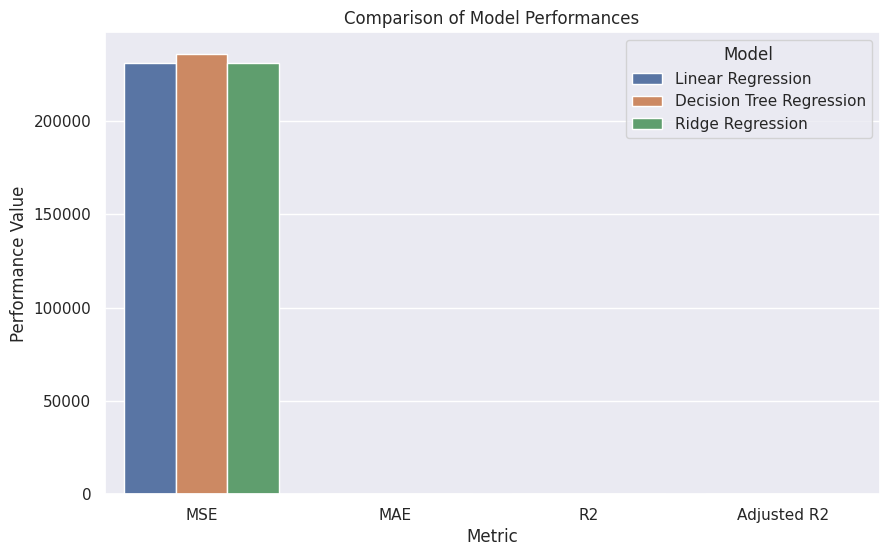

In [ ]:
# 데이터프레임에 저장된 데이터 확인
print(performance_df)

# 데이터프레임의 데이터 타입 확인
print(performance_df.dtypes)

# 모든 지표가 포함되어 있는지 확인
print(performance_df['Metric'].unique())

# 모든 모델이 포함되어 있는지 확인
print(performance_df['Model'].unique())

# seaborn을 사용하여 멀티 막대 그래프 생성
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', hue='Model', data=performance_df)

# 그래프 제목과 레이블 설정
plt.title('Comparison of Model Performances')
plt.ylabel('Performance Value')

# 그래프 표시
plt.show()


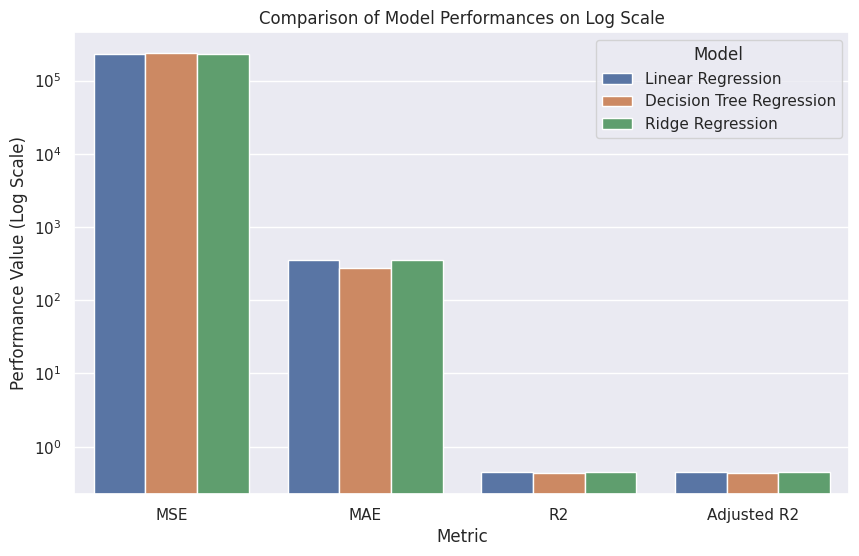

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', hue='Model', data=performance_df)
plt.yscale('log')  # Y축을 로그 스케일로 설정
plt.title('Comparison of Model Performances on Log Scale')
plt.ylabel('Performance Value (Log Scale)')
plt.show()


In [ ]:
# R² 지표가 'R2'라고 가정하고, 해당 지표에 대한 행만 필터링
r2_df = performance_df[performance_df['Metric'] == 'R2']

# R² 값이 가장 높은 행을 찾음
best_r2_model_row = r2_df.loc[r2_df['Value'].idxmax()]

# 가장 R² 값이 높은 모델의 이름과 R² 값을 출력
print(f"The model with the highest R² value is {best_r2_model_row['Model']} with an R² of {best_r2_model_row['Value']:.2f}.")


The model with the highest R² value is Ridge Regression with an R² of 0.45.


3가지 모델 모두 성능이 좋은 편임
어떤 걸 사용할 지는 좀 더 고려해봐야할거 같음

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# 예측에 사용할 새로운 데이터 포인트를 정의합니다.
hour_input = 18
temp_input = 25.0
humidity_input = 40

# 데이터프레임에서 예측 모델에 사용할 특성(독립 변수)을 선택합니다.
X = df[['Hour', 'Temperature(°C)', 'Humidity(%)']]

# 데이터프레임에서 예측할 대상(종속 변수)을 선택합니다.
y = df['Rented Bike Count']

# 선형 회귀 모델 객체를 생성합니다.
model = DecisionTreeRegressor(random_state=42)

# 모델을 특성 데이터와 대상 데이터에 맞게 학습시킵니다.
model.fit(X, y)

# 새로운 데이터 포인트를 데이터프레임 형태로 생성합니다.
new_data = pd.DataFrame({
    'Hour': [hour_input],
    'Temperature(°C)': [temp_input],
    'Humidity(%)': [humidity_input]
})

# 생성된 데이터 포인트에 대해 자전거 대여 수를 예측합니다.
predicted_count = model.predict(new_data)

# 입력된 데이터와 예측 결과를 출력합니다.
print(f"Given input for HRS:" + str(hour_input))
print(f"Given input for Temperature:" + str(temp_input))
print(f"Given input for Humidity:" + str(humidity_input))
print(f"Predicted number of bikes rented: {predicted_count[0]:.2f}")


Given input for HRS:18
Given input for Temperature:25.0
Given input for Humidity:40
Predicted number of bikes rented: 3245.00
